<a href="https://colab.research.google.com/github/Khuks/Loan-Eligibility-prediction/blob/main/Loan_Eligibility_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Expectation from the Notebook

This notebook is divided into the below sections:

1.Introduction to the problem.

2.Exploratory Data Analysis (EDA) and PreProcessing.

3.Feature engineering and Model building.

# Table of Contents

Let’s look at the steps that we will follow in this notebook.

1.Problem Statement

2.Hypothesis Generation

3.Loading the data

4.Understanding the data

5.Exploratory Data Analysis (EDA)

i)Univariate Analysis

ii)Bivariate Analysis

6.Missing value and outlier treatment

7.Feature Engineering

8.Model Building :
    
i)Logistic Regression

ii) Random Forest

iii) LSTM


# Import required packages

In [464]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import io
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

# Data

 For this practice problem, we have been given two CSV files: train and test.

Train file will be used for training the model, i.e. our model will learn from this file. It contains all the independent variables and the target variable.

Test file contains all the independent variables, but not the target variable. We will apply the model to predict the target variable for the test data.

The dataset contains 200 records, it has been splitted in such a way that 80% is for training and 20% is for testing.

# Read Train and Test Data

In [465]:
from google.colab import files
uploaded=files.upload()
training_data=pd.read_excel(io.BytesIO(uploaded['training_data.xlsx']))
print(training_data)

Saving training_data.xlsx to training_data (3).xlsx
      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001002   Male      No          0      Graduate            No   
1    LP001003   Male     Yes          1      Graduate            No   
2    LP001005   Male     Yes          0      Graduate           Yes   
3    LP001006   Male     Yes          0  Not Graduate            No   
4    LP001008   Male      No          0      Graduate            No   
..        ...    ...     ...        ...           ...           ...   
155  LP001536   Male     Yes         3+      Graduate            No   
156  LP001541   Male     Yes          1      Graduate            No   
157  LP001543   Male     Yes          1      Graduate            No   
158  LP001546   Male      No          0      Graduate           NaN   
159  LP001552   Male     Yes          0      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849  

In [466]:
uploaded1=files.upload()
testing_data=pd.read_excel(io.BytesIO(uploaded1['testing_data.xlsx']))
print(testing_data)

Saving testing_data.xlsx to testing_data (3).xlsx
     Loan_ID  Gender Married Dependents     Education Self_Employed  \
0   LP001015    Male     Yes          0      Graduate            No   
1   LP001022    Male     Yes          1      Graduate            No   
2   LP001031    Male     Yes          2      Graduate            No   
3   LP001035    Male     Yes          2      Graduate            No   
4   LP001051    Male      No          0  Not Graduate            No   
5   LP001054    Male     Yes          0  Not Graduate           Yes   
6   LP001055  Female      No          1  Not Graduate            No   
7   LP001056    Male     Yes          2  Not Graduate            No   
8   LP001059    Male     Yes          2      Graduate           NaN   
9   LP001067    Male      No          0  Not Graduate            No   
10  LP001078    Male      No          0  Not Graduate            No   
11  LP001082    Male     Yes          1      Graduate           NaN   
12  LP001083    Male      N

# Copy of original data

Let’s make a copy of train and test data so that even if we have to make any changes in these datasets we would not lose the original datasets.

In [467]:
train_original = training_data.copy()
test_original = testing_data.copy()

# Understanding the Data

In this section, we will look at the structure of the train and test datasets. Firstly, we will check the features present in our data and then we will look at their data types.

In [468]:
training_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We have 12 independent variables and 1 target variable, i.e. Loan_Status in the train dataset. Let’s also have a look at the columns of test dataset.

In [469]:
testing_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

We have similar features in the test dataset as the train dataset except the Loan_Status. We will predict the Loan_Status using the model that we will build using the train data.

# Print the data types

In [470]:
training_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We can see there are three format of data types:


object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status.

int64: It represents the integer variables. ApplicantIncome is of this format.

float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History.

# Shape of the dataset

In [471]:
print('Training data shape: ', training_data.shape)
training_data.head()

Training data shape:  (160, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y


In [472]:
print('Test data shape: ', testing_data.shape)
testing_data.head()

Test data shape:  (40, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110,360,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126,360,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208,360,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100,360,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78,360,1.0,Urban


We have 160 rows and 13 columns in the train dataset and 40 rows and 12 columns in test dataset.

# Univariate Analysis

In this section, we will do univariate analysis. It is the simplest form of analyzing data where we examine each variable individually. 

For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable.

For numerical features, probability density plots can be used to look at the distribution of the variable.

# Target Variable

We will first look at the target variable, i.e., Loan_Status.

As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

Frequency table of a variable will give us the count of each category in that variable.

In [473]:
#train["Loan_Status"].size
training_data['Loan_Status'].count()

160

Size of our target variable is : 160

In [474]:
training_data["Loan_Status"].value_counts()

Y    109
N     51
Name: Loan_Status, dtype: int64

Among 160 Loan_Status :
Accepted : 109
Rejected : 51

In [475]:
# Normalize can be set to True to print proportions instead of number 
training_data["Loan_Status"].value_counts(normalize=True)*100

Y    68.125
N    31.875
Name: Loan_Status, dtype: float64

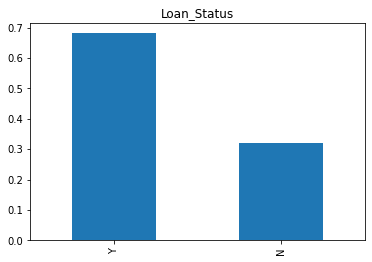

In [476]:
training_data["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status')

The loan of 160(around 68%) people out of 160 was approved and 32% were rejected.

Now lets visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

# Independent Variable (Categorical)

# Analysis on "Gender" variable :

In [477]:
training_data["Gender"].count()

158

Size of our "Gender" variable is : 158

In [478]:
training_data["Gender"].value_counts()

Male      132
Female     26
Name: Gender, dtype: int64

Among 158 person: 
Male : 132
Female : 26

In [479]:
training_data['Gender'].value_counts(normalize=True)*100

Male      83.544304
Female    16.455696
Name: Gender, dtype: float64

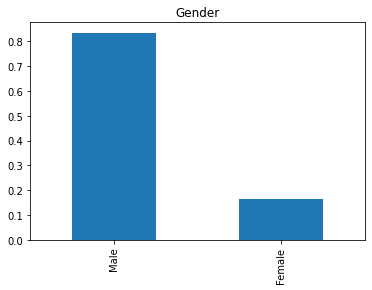

In [480]:
training_data['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender')

In our train dataset the "Gender" variable contain
Male : 84%
Female: 16%     

# Analysis on "Married" variable :

In [481]:
training_data["Married"].count()

159

Size of our "Married" variable is : 159

In [482]:
training_data["Married"].value_counts()

Yes    106
No      53
Name: Married, dtype: int64

Total number of people : 159

Married : 106

Unmarried : 53  

In [483]:
training_data['Married'].value_counts(normalize=True)*100

Yes    66.666667
No     33.333333
Name: Married, dtype: float64

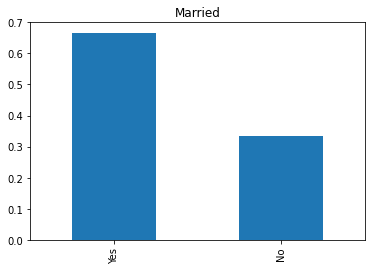

In [484]:
training_data['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

From the Graph we see that :

Number of married people : 67%

Number of unmarried people : 33%    

# Analysis on "Self_Employed" variable : 

In [485]:
training_data["Self_Employed"].count()

150

Size of our "Self_Employed" variable is : 150



In [486]:
training_data["Self_Employed"].value_counts()

No     130
Yes     20
Name: Self_Employed, dtype: int64

Total number of people : 150

Self_Employed : 20

Not_Self_Employed : 130

In [487]:
training_data['Self_Employed'].value_counts(normalize=True)*100

No     86.666667
Yes    13.333333
Name: Self_Employed, dtype: float64

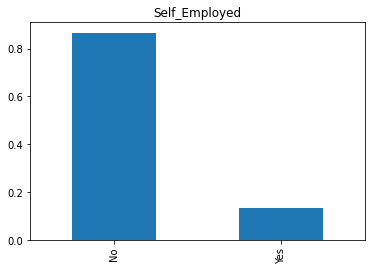

In [488]:
training_data['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

Among 150 people only 13% are Self_Employed and rest of the 87% are Not_Self_Employed

# Analysis on "Credit_History" variable :

In [489]:
training_data["Credit_History"].count()

147

Size of our "Credit_History" variable is : 147

In [490]:
training_data["Credit_History"].value_counts()

1.0    125
0.0     22
Name: Credit_History, dtype: int64

Total number of debts : 147

Repaid Debts : 125

Not Repaid Debts : 22    

In [491]:
training_data['Credit_History'].value_counts(normalize=True)*100

1.0    85.034014
0.0    14.965986
Name: Credit_History, dtype: float64

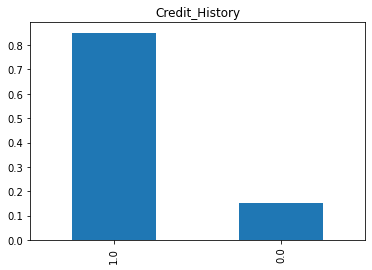

In [492]:
training_data['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')


Around 85% applicants have repaid their debts.

Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

# Independent Variable (Ordinal)

Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

# Analysis on "Dependents" variable :

In [493]:
training_data['Dependents'].count()

157

Size of our "Dependents" variable is : 599

In [494]:
training_data["Dependents"].value_counts()

0     95
2     27
1     23
3+    12
Name: Dependents, dtype: int64

Number of 0 Dependent : 95

Number of 1 Dependent : 23

Number of 2 Dependesnt : 27

Number of 3+ Dependent : 12

In [495]:
training_data['Dependents'].value_counts(normalize=True)*100

0     60.509554
2     17.197452
1     14.649682
3+     7.643312
Name: Dependents, dtype: float64

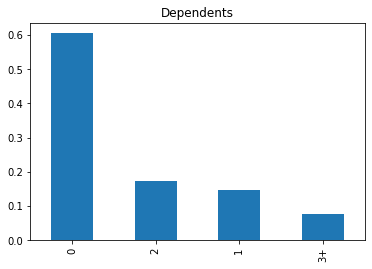

In [496]:
training_data['Dependents'].value_counts(normalize=True).plot.bar(title="Dependents")

60% people have 0 dependent

15% people have 1 dependent

17% people have 2 dependent

8% people have 3+ dependent

# Analysis on "Education" variable :

In [497]:
training_data["Education"].count()

160

Size of Education variable : 160

In [498]:
training_data["Education"].value_counts()

Graduate        130
Not Graduate     30
Name: Education, dtype: int64

People who are Graduated : 130

People who are not Graduated : 30

In [499]:
training_data["Education"].value_counts(normalize=True)*100

Graduate        81.25
Not Graduate    18.75
Name: Education, dtype: float64

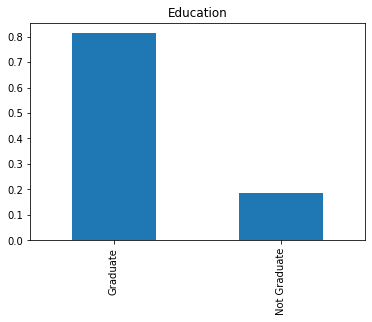

In [500]:
training_data["Education"].value_counts(normalize=True).plot.bar(title = "Education")

Total number of People : 160

81% are Graduated and 19% are not Graduated

# Analysis on "Property_Area" variable :

In [501]:
training_data["Property_Area"].count()

160

Size of "Property_Area" variable : 614

In [502]:
training_data["Property_Area"].value_counts()

Urban        70
Semiurban    62
Rural        28
Name: Property_Area, dtype: int64

Total number of People : 160

People from Semiurban area : 62

People from Urban area : 70

People from Rural area : 28
    

In [503]:
training_data["Property_Area"].value_counts(normalize=True)*100

Urban        43.75
Semiurban    38.75
Rural        17.50
Name: Property_Area, dtype: float64

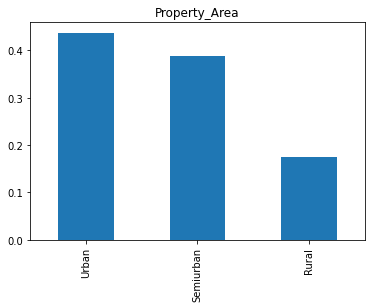

In [504]:
training_data["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area")

39% people from Semiurban area

44% people from Urban area

17% people from Rural area

# Independent Variable (Numerical)

Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

# "ApplicantIncome" distribution :

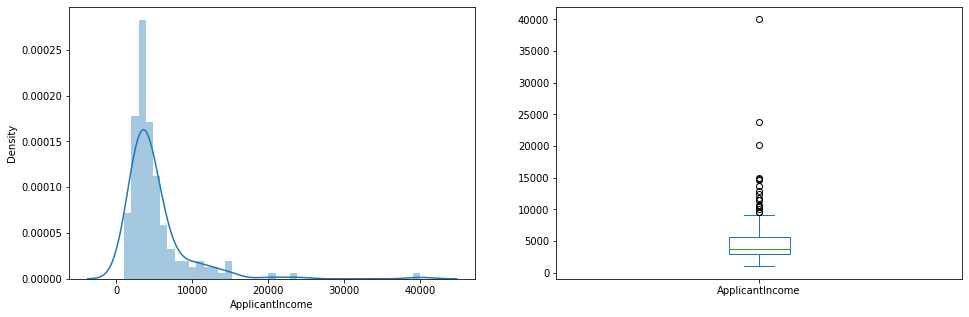

In [505]:
plt.figure(1)
plt.subplot(121)
sns.distplot(training_data["ApplicantIncome"]);

plt.subplot(122)
training_data["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society.

Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

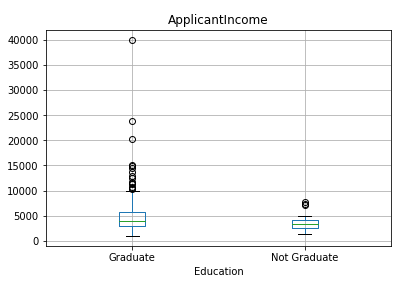

In [506]:
training_data.boxplot(column='ApplicantIncome',by="Education" )
plt.suptitle(" ")
plt.show()

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

# Let’s look at the "CoapplicantIncome" distribution:


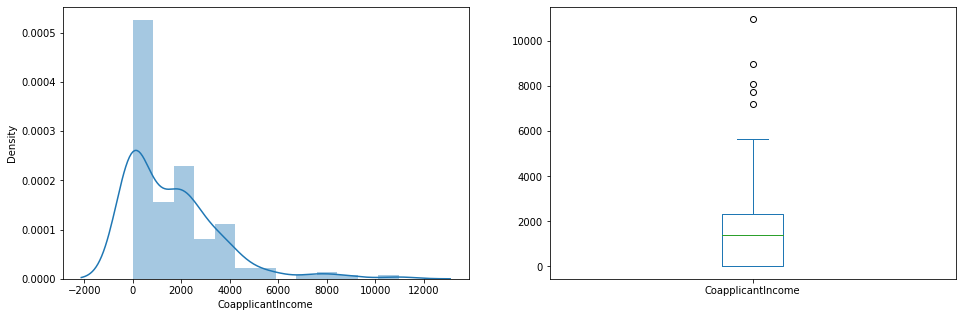

In [507]:
plt.figure(1)
plt.subplot(121)
sns.distplot(training_data["CoapplicantIncome"]);

plt.subplot(122)
training_data["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

# Let’s look at the distribution of "LoanAmount" variable :

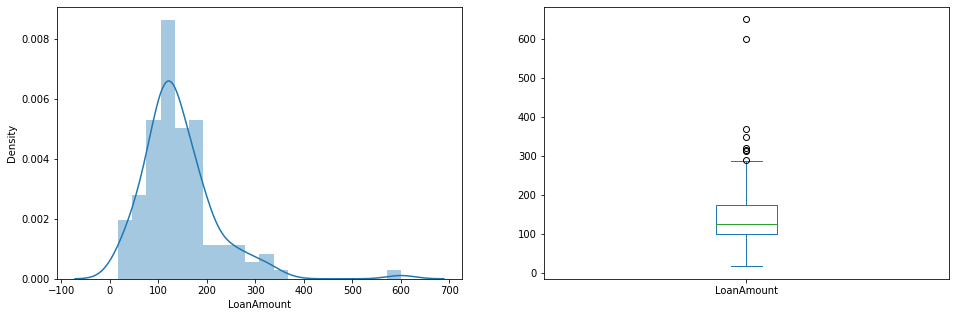

In [508]:
plt.figure(1)
plt.subplot(121)
df=training_data.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
training_data['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

# distribution of "LoanAmountTerm" variable :

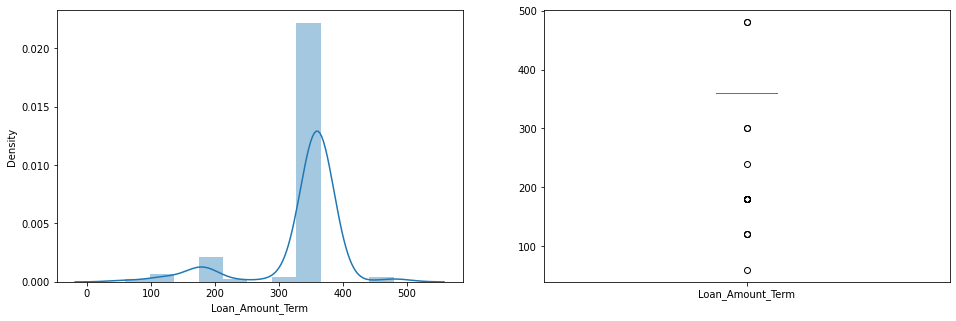

In [509]:
plt.figure(1)
plt.subplot(121)
df = training_data.dropna()
sns.distplot(df["Loan_Amount_Term"]);

plt.subplot(122)
df["Loan_Amount_Term"].plot.box(figsize=(16,5))
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

# Bivariate Analysis

Lets recall some of the hypotheses that we generated earlier:

i)Applicants with high income should have more chances of loan approval.

ii)Applicants who have repaid their previous debts should have higher chances of loan approval.

iii)Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

iv)Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

Lets try to test the above mentioned hypotheses using bivariate analysis.

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

# Categorical Independent Variable vs Target Variable

First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.

# Relation between "Loan_Status" and "Gender"

Loan_Status   N   Y
Gender             
Female        9  17
Male         41  91


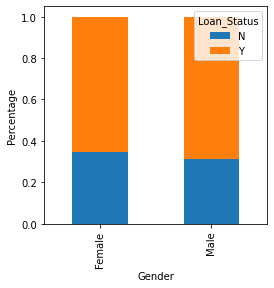

In [510]:
print(pd.crosstab(training_data["Gender"],training_data["Loan_Status"]))
Gender = pd.crosstab(training_data["Gender"],training_data["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

Number of Female whose Loan was approed : 17

Number of Male whose Loan was approed : 91

Number of Female whose Loan was not approved : 9

Number of Male whose Loan was not approed : 41

Proportion of Male applicants is higher for the approved loans.

# Relation between "Loan_Status" and "Married"

Loan_Status   N   Y
Married            
No           19  34
Yes          32  74


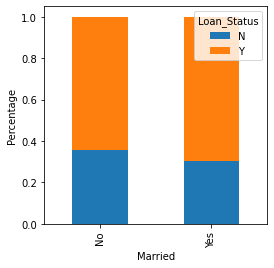

In [511]:
print(pd.crosstab(training_data["Married"],training_data["Loan_Status"]))
Married=pd.crosstab(training_data["Married"],training_data["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

Number of married people whose Loan was approed : 74

Number of married people whose Loan was not approved : 32

Number of unmarried people whose Loan was approed : 34

Number of unmarried people whose Loan was not approved : 19

Proportion of Married applicants is higher for the approved loans.

# Relation between "Loan_Status" and "Dependents"

Loan_Status   N   Y
Dependents         
0            30  65
1             9  14
2             7  20
3+            5   7


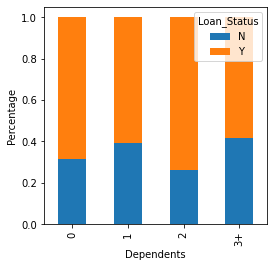

In [512]:
print(pd.crosstab(training_data['Dependents'],training_data["Loan_Status"]))
Dependents = pd.crosstab(training_data['Dependents'],training_data["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Dependents")
plt.ylabel("Percentage")
plt.show()

Number of dependents on the loan applicant : 0  and Loan was approed : 65

Number of dependents on the loan applicant : 0  and Loan was not approved : 30

Number of dependents on the loan applicant : 1  and Loan was approved : 14

Number of dependents on the loan applicant : 1  and Loan was not approved : 9

Number of dependents on the loan applicant : 2  and Loan was approed : 20

Number of dependents on the loan applicant : 2  and Loan was not approed : 7

Number of dependents on the loan applicant : 3+  and Loan was approed : 7

Number of dependents on the loan applicant : 3+  and Loan was not approed : 5

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

# Relation between "Loan_Status" and "Education"

Loan_Status    N   Y
Education           
Graduate      39  91
Not Graduate  12  18


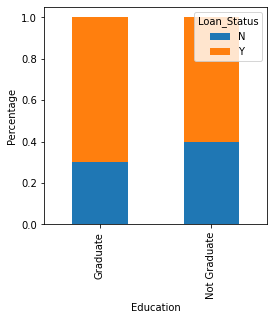

In [513]:
print(pd.crosstab(training_data["Education"],training_data["Loan_Status"]))
Education = pd.crosstab(training_data["Education"],training_data["Loan_Status"])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Education")
plt.ylabel("Percentage")
plt.show()

Number of people who are Graduate and Loan was approed : 91

Number of people who are Graduate and Loan was no approed : 39

Number of people who are Not Graduate and Loan was approed : 18

Number of people who are Not Graduate and Loan was not approed : 12

Proportion of Graduate applicants is higher for the approved loans.


# Relation between "Loan_Status" and "Self_Employed"

Loan_Status     N   Y
Self_Employed        
No             42  88
Yes             5  15


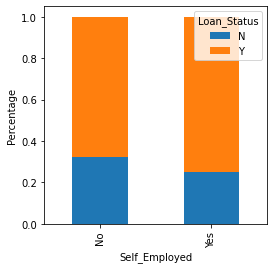

In [514]:
print(pd.crosstab(training_data["Self_Employed"],training_data["Loan_Status"]))
SelfEmployed = pd.crosstab(training_data["Self_Employed"],training_data["Loan_Status"])
SelfEmployed.div(SelfEmployed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Self_Employed")
plt.ylabel("Percentage")
plt.show()

People who are Self_Employed and Loan was approed : 15

People who are Self_Employed and Loan was not approed : 5

People who are not Self_Employed and Loan was approed : 88

People who are not Self_Employed and Loan was not approed :42

There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

# Relation between "Loan_Status" and "Credit_History"

Loan_Status      N   Y
Credit_History        
0.0             20   2
1.0             26  99


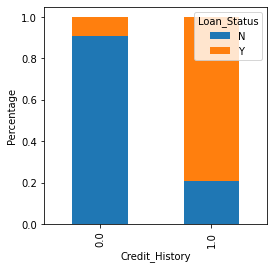

In [515]:
print(pd.crosstab(training_data["Credit_History"],training_data["Loan_Status"]))
CreditHistory = pd.crosstab(training_data["Credit_History"],training_data["Loan_Status"])
CreditHistory.div(CreditHistory.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Credit_History")
plt.ylabel("Percentage")
plt.show()

# Relation between "Loan_Status" and "Property_Area"

People with credit history as 1 and loan was approved : 99

People with credit history as 1 and loan was not approved : 26

People with credit history as 0 and loan was approved : 2

People with credit history as 0 and loan was not approved : 20

It seems people with credit history as 1 are more likely to get their loans approved.

Loan_Status     N   Y
Property_Area        
Rural          19   9
Semiurban      13  49
Urban          19  51


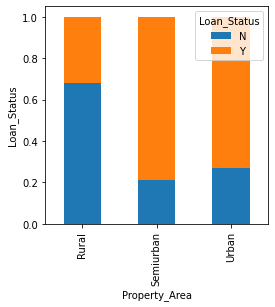

In [516]:
print(pd.crosstab(training_data["Property_Area"],training_data["Loan_Status"]))
PropertyArea = pd.crosstab(training_data["Property_Area"],training_data["Loan_Status"])
PropertyArea.div(PropertyArea.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Property_Area")
plt.ylabel("Loan_Status")
plt.show()

People who are from Rural area and loan was approved : 9

People who are from Rural area and loan was not approved : 19

People who are from Semiurban area and loan was approved : 49

People who are from Semiurban area and loan was not approved : 13

People who are from Urban area and loan was approved : 51

People who are from Semiurban area and loan was not approved : 19

Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

# Numerical Independent Variable vs Target Variable

# Relation between "Loan_Status" and "Income"

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

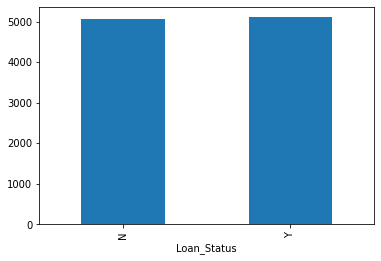

In [517]:
training_data.groupby("Loan_Status")['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. We don’t see any change in the mean income.
So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [518]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
training_data['Income_bin']=pd.cut(training_data['ApplicantIncome'],bins,labels=group)


Loan_Status   N   Y
Income_bin         
Low           6  22
Average      17  41
High         16  28
Very high    12  18


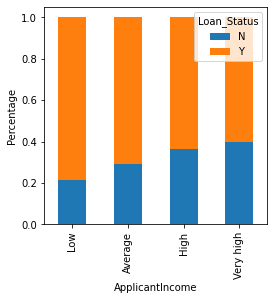

In [519]:
print(pd.crosstab(training_data["Income_bin"],training_data["Loan_Status"]))
Income_bin = pd.crosstab(training_data["Income_bin"],training_data["Loan_Status"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

We will analyze the coapplicant income and loan amount variable in similar way.

In [520]:
bins=[0,1000,3000,42000]
group =['Low','Average','High']
training_data['CoapplicantIncome_bin']=pd.cut(training_data["CoapplicantIncome"],bins,labels=group)

Loan_Status             N   Y
CoapplicantIncome_bin        
Low                     0   5
Average                17  41
High                   12  18


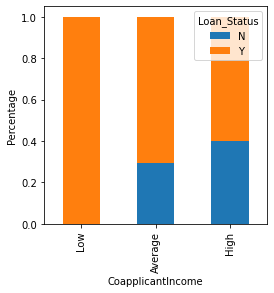

In [521]:
print(pd.crosstab(training_data["CoapplicantIncome_bin"],training_data["Loan_Status"]))
CoapplicantIncome_Bin = pd.crosstab(training_data["CoapplicantIncome_bin"],training_data["Loan_Status"])
CoapplicantIncome_Bin.div(CoapplicantIncome_Bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("CoapplicantIncome")
plt.ylabel("Percentage")
plt.show()

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

In [522]:
training_data["TotalIncome"]=training_data["ApplicantIncome"]+training_data["CoapplicantIncome"]

In [523]:
bins =[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
training_data["TotalIncome_bin"]=pd.cut(training_data["TotalIncome"],bins,labels=group)

Loan_Status       N   Y
TotalIncome_bin        
Low               2   3
Average           6  26
High             17  40
Very High        26  40


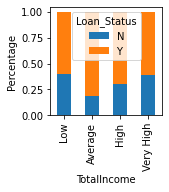

In [524]:
print(pd.crosstab(training_data["TotalIncome_bin"],training_data["Loan_Status"]))
TotalIncome = pd.crosstab(training_data["TotalIncome_bin"],training_data["Loan_Status"])
TotalIncome.div(TotalIncome.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(2,2))
plt.xlabel("TotalIncome")
plt.ylabel("Percentage")
plt.show()

# Relation between "Loan_Status" and "Loan Amount"

In [525]:
bins = [0,100,200,700]
group=['Low','Average','High']
training_data["LoanAmount_bin"]=pd.cut(training_data["LoanAmount"],bins,labels=group)

Loan_Status      N   Y
LoanAmount_bin        
Low              7  35
Average         31  57
High            11  10


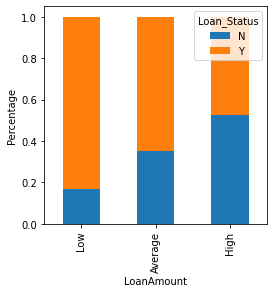

In [526]:
print(pd.crosstab(training_data["LoanAmount_bin"],training_data["Loan_Status"]))
LoanAmount=pd.crosstab(training_data["LoanAmount_bin"],training_data["Loan_Status"])
LoanAmount.div(LoanAmount.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("LoanAmount")
plt.ylabel("Percentage")
plt.show()

# Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable

In [527]:
training_data=training_data.drop(["Income_bin","CoapplicantIncome_bin","LoanAmount_bin","TotalIncome","TotalIncome_bin"],axis=1)

In [528]:
#train['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)
#test['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)
training_data['Dependents'].replace('3+',3,inplace=True)
testing_data['Dependents'].replace('3+',3,inplace=True)
training_data['Loan_Status'].replace('N', 0,inplace=True)
training_data['Loan_Status'].replace('Y', 1,inplace=True)

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring.
The variables with darker color means their correlation is more.

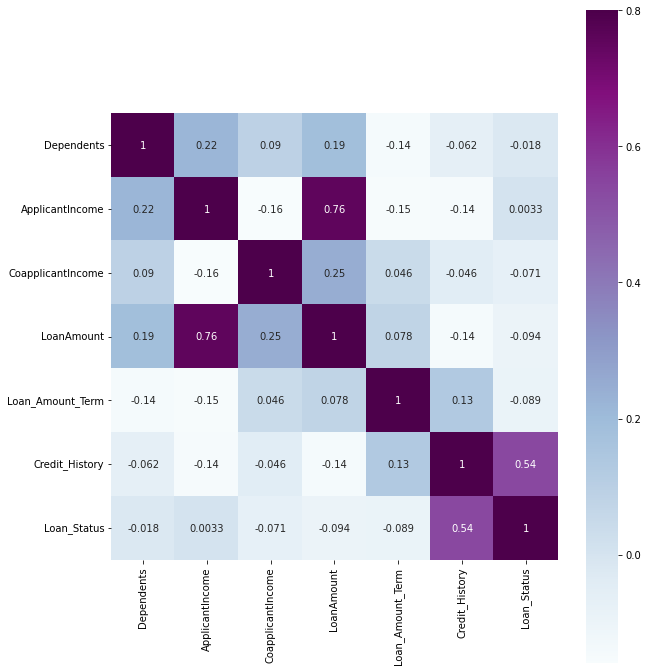

In [529]:
matrix = training_data.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True);

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status).

# Missing Value and Outlier Treatment

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

# Missing value imputation

Let’s list out feature-wise count of missing values.

In [530]:
training_data.isnull().sum()

Loan_ID               0
Gender                2
Married               1
Dependents            3
Education             0
Self_Employed        10
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            9
Loan_Amount_Term      6
Credit_History       13
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

For numerical variables: imputation using mean or median
    
For categorical variables: imputation using mode

There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features

In [531]:
training_data["Gender"].fillna(training_data["Gender"].mode()[0],inplace=True)
training_data["Married"].fillna(training_data["Married"].mode()[0],inplace=True)
training_data['Dependents'].fillna(training_data["Dependents"].mode()[0],inplace=True)
training_data["Self_Employed"].fillna(training_data["Self_Employed"].mode()[0],inplace=True)
training_data["Credit_History"].fillna(training_data["Credit_History"].mode()[0],inplace=True)

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. 
We will look at the value count of the Loan amount term variable.

In [532]:
training_data["Loan_Amount_Term"].value_counts()

360.0    133
180.0     10
120.0      3
480.0      3
240.0      2
300.0      2
60.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most.
So we will replace the missing values in this variable using the mode of this variable.

In [533]:
training_data["Loan_Amount_Term"].fillna(training_data["Loan_Amount_Term"].mode()[0],inplace=True)

In [534]:
training_data["Loan_Amount_Term"].value_counts()

360.0    139
180.0     10
120.0      3
480.0      3
240.0      2
300.0      2
60.0       1
Name: Loan_Amount_Term, dtype: int64

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values.

We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [535]:
training_data["LoanAmount"].fillna(training_data["LoanAmount"].median(),inplace=True)

Now lets check whether all the missing values are filled in the dataset.

In [536]:
training_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in the train dataset.

Let’s fill all the missing values in the test dataset too with the same approach

In [537]:
testing_data.isnull().sum()

Loan_ID              0
Gender               1
Married              0
Dependents           0
Education            0
Self_Employed        4
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       4
Property_Area        0
dtype: int64

In [538]:
testing_data["Gender"].fillna(testing_data["Gender"].mode()[0],inplace=True)
testing_data['Dependents'].fillna(testing_data["Dependents"].mode()[0],inplace=True)
testing_data["Self_Employed"].fillna(testing_data["Self_Employed"].mode()[0],inplace=True)
testing_data["Loan_Amount_Term"].fillna(testing_data["Loan_Amount_Term"].mode()[0],inplace=True)
testing_data["Credit_History"].fillna(testing_data["Credit_History"].mode()[0],inplace=True)
testing_data["LoanAmount"].fillna(testing_data["LoanAmount"].median(),inplace=True)

In [539]:
testing_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

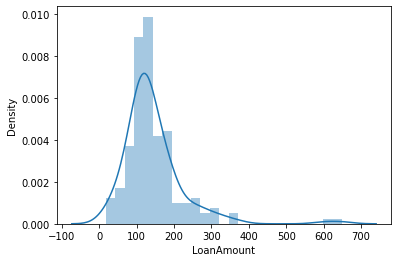

In [540]:
sns.distplot(training_data["LoanAmount"]);

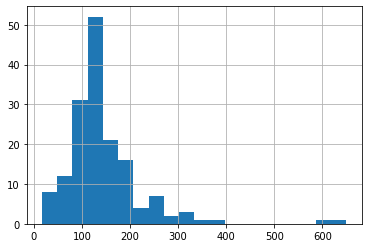

In [541]:
training_data['LoanAmount'].hist(bins=20)

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness.

One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. 

So, we get a distribution similar to normal distribution.

Let’s visualize the effect of log transformation. 

We will do the similar changes to the test file simultaneously.

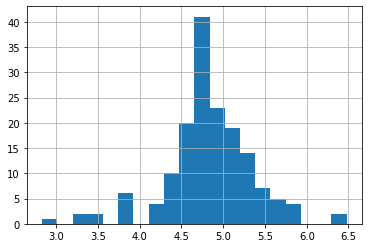

In [542]:
training_data['LoanAmount_log'] = np.log(training_data['LoanAmount'])
training_data['LoanAmount_log'].hist(bins=20)

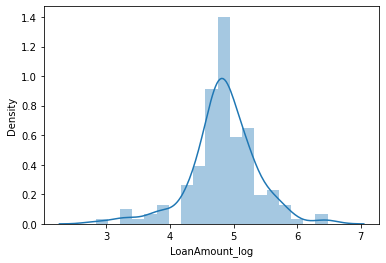

In [543]:
sns.distplot(training_data["LoanAmount_log"])

Let's have a look in test set [LoanAmount]

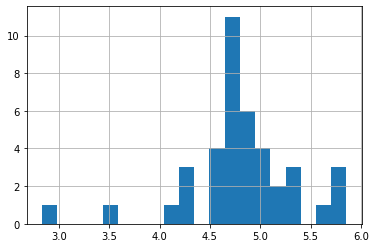

In [544]:
testing_data["LoanAmount_log"]=np.log(training_data["LoanAmount"])
testing_data['LoanAmount_log'].hist(bins=20)

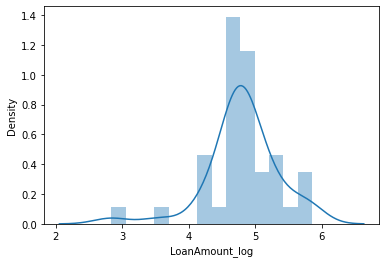

In [545]:
sns.distplot(testing_data["LoanAmount_log"])

# Feature Engineering

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.

EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.

Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [546]:
training_data["TotalIncome"]=training_data["ApplicantIncome"]+training_data["CoapplicantIncome"]

Just have a look of train dataset  "TotalIncome"

In [547]:
training_data[["TotalIncome"]].head()

,TotalIncome
0,5849
1,6091
2,3000
3,4941
4,6000


In [548]:
testing_data["TotalIncome"]=testing_data["ApplicantIncome"]+testing_data["CoapplicantIncome"]

Just have a look of test dataset "TotalIncome"

In [549]:
testing_data[["TotalIncome"]].head()

,TotalIncome
0,5720
1,4576
2,6800
3,4886
4,3276


Let’s check the distribution of train dataset Total Income.

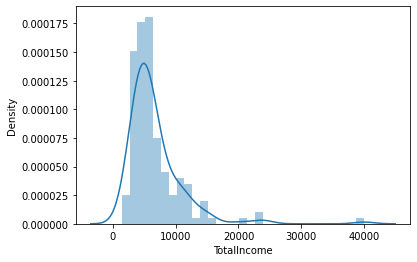

In [550]:
sns.distplot(training_data["TotalIncome"])

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

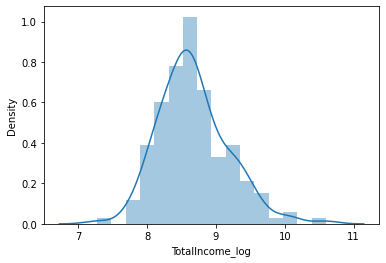

In [551]:
training_data["TotalIncome_log"]=np.log(training_data["TotalIncome"])
sns.distplot(training_data["TotalIncome_log"])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

Let’s check the distribution of test dataset Total Income.

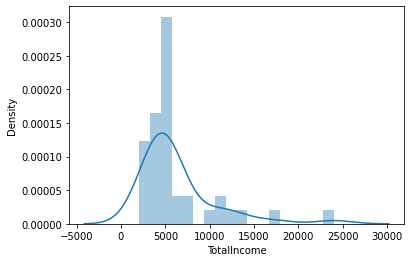

In [552]:
sns.distplot(testing_data["TotalIncome"])

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

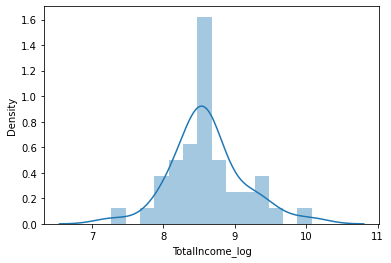

In [553]:
testing_data["TotalIncome_log"] = np.log(training_data["TotalIncome"])
sns.distplot(testing_data["TotalIncome_log"])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

Now create the EMI feature.

In [554]:
training_data["EMI"]=training_data["LoanAmount"]/training_data["Loan_Amount_Term"]
testing_data["EMI"]=testing_data["LoanAmount"]/testing_data["Loan_Amount_Term"]

Have a look of train dataset "EMI"

In [555]:
training_data[["EMI"]].head()

,EMI
0,0.347222
1,0.355556
2,0.183333
3,0.333333
4,0.391667


Again have a look of test dataset "EMI"

In [556]:
testing_data[["EMI"]].head()

,EMI
0,0.305556
1,0.350000
2,0.577778
3,0.277778
4,0.216667


Let’s check the distribution of EMI variable.

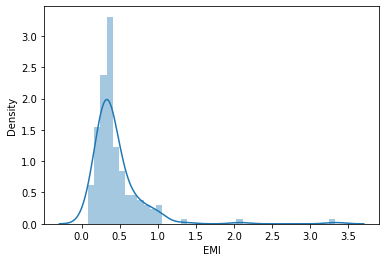

In [557]:
sns.distplot(training_data["EMI"])

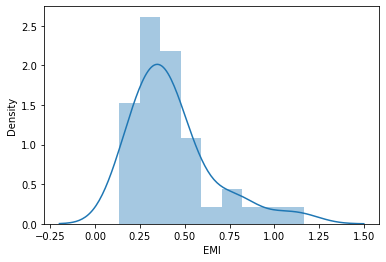

In [558]:
sns.distplot(testing_data["EMI"])

Let's create Balance Income feature now and check its distribution.

In [559]:
training_data["Balance_Income"] = training_data["TotalIncome"]-training_data["EMI"]*1000 # To make the units equal we multiply with 1000
testing_data["Balance_Income"] = testing_data["TotalIncome"]-testing_data["EMI"]

Have a look of train dataset "Balance Income"

In [560]:
training_data[["Balance_Income"]].head()

,Balance_Income
0,5501.777778
1,5735.444444
2,2816.666667
3,4607.666667
4,5608.333333


Have a look of test dataset "Balance Income"

In [561]:
testing_data[["Balance_Income"]].head()

,Balance_Income
0,5719.694444
1,4575.650000
2,6799.422222
3,4885.722222
4,3275.783333


Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [562]:
training_data=training_data.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [563]:
training_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,LP001002,Male,No,0.0,Graduate,No,1.0,Urban,1,4.828314,5849,8.674026,0.347222,5501.777778
1,LP001003,Male,Yes,1.0,Graduate,No,1.0,Rural,0,4.852030,6091,8.714568,0.355556,5735.444444
2,LP001005,Male,Yes,0.0,Graduate,Yes,1.0,Urban,1,4.189655,3000,8.006368,0.183333,2816.666667
3,LP001006,Male,Yes,0.0,Not Graduate,No,1.0,Urban,1,4.787492,4941,8.505323,0.333333,4607.666667
4,LP001008,Male,No,0.0,Graduate,No,1.0,Urban,1,4.948760,6000,8.699515,0.391667,5608.333333


In [564]:
testing_data = testing_data.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [565]:
testing_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,LP001015,Male,Yes,0,Graduate,No,1.0,Urban,4.828314,5720,8.674026,0.305556,5719.694444
1,LP001022,Male,Yes,1,Graduate,No,1.0,Urban,4.852030,4576,8.714568,0.350000,4575.650000
2,LP001031,Male,Yes,2,Graduate,No,1.0,Urban,4.189655,6800,8.006368,0.577778,6799.422222
3,LP001035,Male,Yes,2,Graduate,No,1.0,Urban,4.787492,4886,8.505323,0.277778,4885.722222
4,LP001051,Male,No,0,Not Graduate,No,1.0,Urban,4.948760,3276,8.699515,0.216667,3275.783333


# Data Preprocessing 

After creating new features, we can continue the model building process. So we will start with logistic regression model and then move over to more complex models like RandomForest and Logistic Regression.

We will build the following models in this section.

i)Logistic Regression

ii)Random Forest

iii)Long Short Term Memory

Let’s prepare the data for feeding into the models.

Let's drop the "Loan_ID" variable as it do not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.

Drop "Loan_ID"

In [566]:
training_data=training_data.drop("Loan_ID",axis=1)
testing_data=testing_data.drop("Loan_ID",axis=1)

After drop train dataset will look :

In [567]:
training_data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,Male,No,0.0,Graduate,No,1.0,Urban,1,4.828314,5849,8.674026,0.347222,5501.777778
1,Male,Yes,1.0,Graduate,No,1.0,Rural,0,4.852030,6091,8.714568,0.355556,5735.444444
2,Male,Yes,0.0,Graduate,Yes,1.0,Urban,1,4.189655,3000,8.006368,0.183333,2816.666667


After drop test dataset will look :

In [568]:
testing_data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,Male,Yes,0,Graduate,No,1.0,Urban,4.828314,5720,8.674026,0.305556,5719.694444
1,Male,Yes,1,Graduate,No,1.0,Urban,4.852030,4576,8.714568,0.350000,4575.650000
2,Male,Yes,2,Graduate,No,1.0,Urban,4.189655,6800,8.006368,0.577778,6799.422222


We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python.

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.

droping the target variable "Loan_Status"

In [569]:
X=training_data.drop("Loan_Status",1)

In [570]:
X.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,Male,No,0.0,Graduate,No,1.0,Urban,4.828314,5849,8.674026,0.347222,5501.777778
1,Male,Yes,1.0,Graduate,No,1.0,Rural,4.852030,6091,8.714568,0.355556,5735.444444


save the target variable "Loan_Status" in another dataset

In [571]:
y=training_data[["Loan_Status"]]

In [572]:
y.head(2)

,Loan_Status
0,1
1,0


Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. 

Let us understand the process of dummies first:

Consider the “Gender” variable. It has two classes, Male and Female.

As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.

Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female),
one for each class, i.e. Male and Female.


Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.

In [573]:
X = pd.get_dummies(X)

In [574]:
X.head(3)

,Dependents,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,4.828314,5849,8.674026,0.347222,5501.777778,0,1,1,0,1,0,1,0,0,0,1
1,1.0,1.0,4.852030,6091,8.714568,0.355556,5735.444444,0,1,0,1,1,0,1,0,1,0,0
2,0.0,1.0,4.189655,3000,8.006368,0.183333,2816.666667,0,1,0,1,1,0,0,1,0,0,1


In [575]:
training_data=pd.get_dummies(training_data)
testing_data=pd.get_dummies(testing_data)

In [576]:
training_data.head(3)

,Dependents,Credit_History,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,1,4.828314,5849,8.674026,0.347222,5501.777778,0,1,1,0,1,0,1,0,0,0,1
1,1.0,1.0,0,4.852030,6091,8.714568,0.355556,5735.444444,0,1,0,1,1,0,1,0,1,0,0
2,0.0,1.0,1,4.189655,3000,8.006368,0.183333,2816.666667,0,1,0,1,1,0,0,1,0,0,1


In [577]:
testing_data.head(3)

,Dependents,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1.0,4.828314,5720,8.674026,0.305556,5719.694444,0,1,0,1,1,0,1,0,0,0,1
1,1,1.0,4.852030,4576,8.714568,0.350000,4575.650000,0,1,0,1,1,0,1,0,0,0,1
2,2,1.0,4.189655,6800,8.006368,0.577778,6799.422222,0,1,0,1,1,0,1,0,0,0,1


Now we will train the model on training dataset and make predictions for the test dataset. But can we validate these predictions?
One way of doing this is we can divide our train dataset into two parts:train and validation.
We can train the model on this train part and using that make predictions for the validation part.
In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).



We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.

In [578]:
from sklearn.model_selection import train_test_split

In [579]:
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.2,random_state=42)

The dataset has been divided into training and validation part.

80% data will use for train the model and rest of the 20% data will use for checking validation of the model. 

# Feature Importance

Before fitting the training dataset, we need to identify the most important feature in our dataset.

We will use XGBoost Classifier to determine the most important feature.

In [580]:
# import xgboost classifier
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
# create the classifier with n_estimators = 100

clf = xgb.XGBClassifier()


In [581]:
# fit the model to the training set

clf.fit(x_train,y_train)

XGBClassifier()

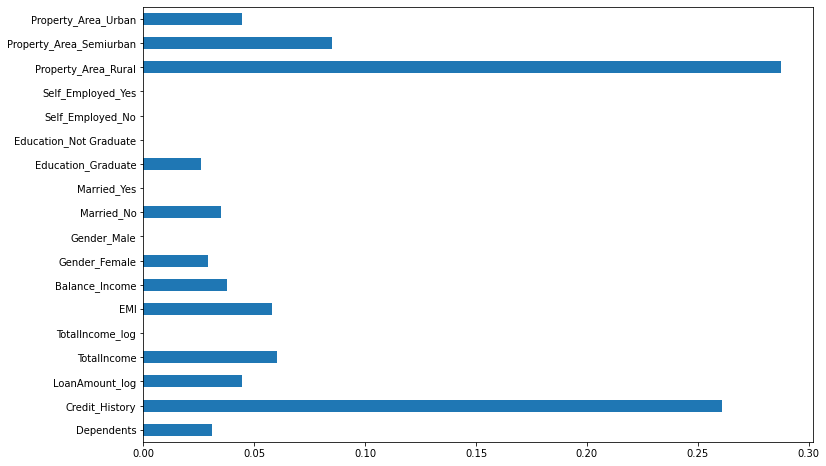

In [582]:
importances = pd.Series(clf.feature_importances_,index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

Credit History is the most important feature according Random Forest Classifiction.

#  Model Building and Model Implimantation

We will build and implimant the following models:
- Logistic Regression
- Random Forest
- DNN

## 1. Logistic Regression

Let's import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [583]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

In [584]:
logistic_model = LogisticRegression(random_state=5)

In [585]:
logistic_model.fit(x_train,y_train)

LogisticRegression(random_state=5)

Let’s predict the Loan_Status for validation set

In [586]:
pred_cv_logistic=logistic_model.predict(x_cv)
pred_cv_logistic

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

### Evaluation Metrics For Logistic Regression

In [587]:
print('MAE:', metrics.mean_absolute_error(y_cv,pred_cv_logistic))
print('MSE:', metrics.mean_squared_error(y_cv,pred_cv_logistic))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_cv,pred_cv_logistic)))

MAE: 0.21875
MSE: 0.21875
RMSE: 0.46770717334674267


### Accuracy Score For Logistic Regression

Now calculate how accurate our predictions are by calculating the accuracy.

In [588]:
score_logistic =accuracy_score(pred_cv_logistic,y_cv)*100 

In [589]:
score_logistic

78.125

### Confusion Metrix For Logistic Regression

Text(0.5, 1.0, 'Accuracy Score: 78.125 %')

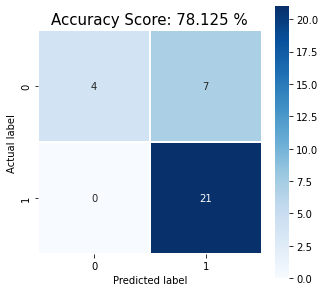

In [590]:
cm = confusion_matrix(y_cv,pred_cv_logistic)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0} %'.format(logistic_model.score(x_cv,y_cv)*100)
plt.title(all_sample_title, size = 15)

So our predictions are almost 81.25% accurate, i.e. we have identified 81.25% of the loan status correctly for our logistic regression model.

Let’s make predictions for the test dataset.

### Prediction on Test Dataset

In [591]:
pred_test_logistic = logistic_model.predict(testing_data)
pred_test_logistic

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

## 2. Random Forest 






i)RandomForest is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model.

ii)For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model.

iii)Final prediction can be a function of all the predictions made by the individual learners.

Let's import Random Forest Classifier


In [592]:
from sklearn.ensemble import RandomForestClassifier

In [593]:
forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)

In [594]:
forest_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=1)

In [595]:
pred_cv_forest=forest_model.predict(x_cv)
pred_cv_forest

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0])

### Evaluation Matrics for Random Forest

In [596]:
print('MAE:', metrics.mean_absolute_error(y_cv,pred_cv_forest))
print('MSE:', metrics.mean_squared_error(y_cv,pred_cv_forest))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_cv,pred_cv_forest)))

MAE: 0.21875
MSE: 0.21875
RMSE: 0.46770717334674267


### Accuracy Score Fore Random Forest

In [597]:
score_forest = accuracy_score(pred_cv_forest,y_cv)*100

In [598]:
score_forest

78.125

our predictions are almost 78% accurate, i.e. we have identified 78% of the loan status correctly for our Random Forest model.

Let’s make predictions for the test dataset.

In [599]:
pred_test_forest=forest_model.predict(testing_data)
pred_test_forest

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

### Confusion Matrix for Random Forest

Text(0.5, 1.0, 'Accuracy Score: 78.125 %')

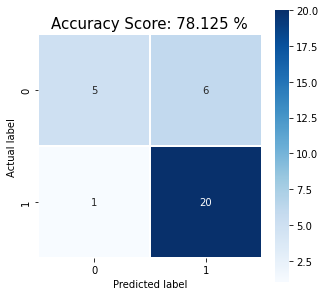

In [600]:
cm = confusion_matrix(y_cv,pred_cv_forest)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0} %'.format(forest_model.score(x_cv,y_cv)*100)
plt.title(all_sample_title, size = 15)

## 3. DNN /MLP Classifier

In [601]:
y=training_data['Loan_Status']
X=training_data.drop(['Loan_Status'], axis=1)

In [602]:
X = pd.get_dummies(X)

In [603]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [604]:
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)

print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (112, 18)
y_train.shape:  (112,)
X_test.shape:  (48, 18)
y_test.shape:  (48,)


### DNN / Multilayer Perceptron

In [605]:
#train the model
model5 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(100,100), random_state=2)
mlp = model5.fit(X_train, y_train)

In [606]:
model5.get_params(deep=True)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100, 100),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 2,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [607]:
#predictions
y_pred_mlp = model5.predict(X_test)

In [608]:
y_pred_mlp 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

### Evaluation Matrics for Deep Neural Network / Multilayer Perceptron

In [609]:
print("Accuracy MLP:",metrics.accuracy_score(y_test, y_pred_mlp)*100,"%")
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_mlp))
print('MSE:', metrics.mean_squared_error(y_test,y_pred_mlp))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_mlp)))

Accuracy MLP: 64.58333333333334 %
MAE: 0.3541666666666667
MSE: 0.3541666666666667
RMSE: 0.5951190357119042


In [610]:
# Let us made predictions on testing data
pred_test_dnn=model5.predict(testing_data)
pred_test_dnn

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Confusion Matrix for Deep Neural Network / MLPClassifier

Text(0.5, 1.0, 'Accuracy Score: 64.58333333333334 %')

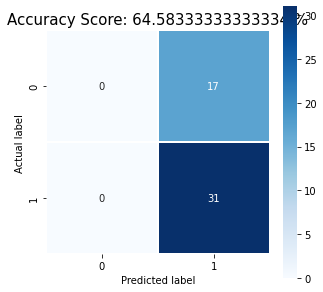

In [611]:
cm = confusion_matrix(y_test,y_pred_mlp)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0} %'.format(model5.score(X_test,y_test)*100)
plt.title(all_sample_title, size = 15)